**IPL Insights**

Data Analysis and some visulaition insights on IPL dataset



Dataset: https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=pd.read_csv('/content/drive/MyDrive/datasets/IPL_Ball_by_Ball_2008_2022/IPL_Ball_by_Ball_2008_2022.csv',encoding="utf8")

In [126]:
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


The dataset has each ball stats which has runs scored and if its wicket or not along with player and team names

In [10]:
df.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [14]:
df["total_run"].unique()

array([0, 1, 4, 6, 3, 2, 5, 7])

Starting off with total_run column and there seems to be runs like 5 and 7 on few cases in a single ball. Lets look into the same.

In [22]:
(df['total_run']==7).sum()

64

There seems to be 64 occurences of 7 runs. Also listing top 4 batsman and bowler who scored and gave 7 runs.

In [127]:
df[df['total_run']==7].batter.value_counts()[:5]

batter
CH Gayle          5
AB de Villiers    3
MS Dhoni          3
DA Warner         3
KA Pollard        3
Name: count, dtype: int64

In [128]:
df[df['total_run']==7].bowler.value_counts()[:5]


bowler
MM Patel          3
Mohammed Siraj    3
KMA Paul          2
SL Malinga        2
MJ McClenaghan    2
Name: count, dtype: int64

In [129]:
#Lets try to check bowler and batter combination for 7 runs
grouped=df[df["total_run"]==7].groupby(["total_run","batter","bowler"]).size()
print(grouped)

total_run  batter          bowler         
7          AB de Villiers  AN Ahmed           1
                           L Balaji           1
                           MM Patel           1
           AD Russell      Mohammed Siraj     1
           AJ Finch        V Shankar          1
                                             ..
           SW Billings     Avesh Khan         1
           V Kohli         KC Cariappa        1
           V Sehwag        Joginder Sharma    1
           VVS Laxman      A Mithun           1
           WPUJC Vaas      VY Mahesh          1
Length: 63, dtype: int64


In [130]:
#Just checking how data looks like when 7 runs are scored. Extra_type in all these cases has been no balls
df[(df['batter'] == 'CH Gayle') & (df['total_run'] == 7)]


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
138132,598045,1,18,3,CH Gayle,P Awana,V Kohli,noballs,6,1,7,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
147167,598008,2,15,4,CH Gayle,JH Kallis,AB de Villiers,noballs,6,1,7,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
151875,548372,1,16,3,CH Gayle,UT Yadav,V Kohli,noballs,6,1,7,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
154852,548360,2,10,6,CH Gayle,PP Ojha,V Kohli,noballs,6,1,7,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
172877,501247,2,2,2,CH Gayle,P Parameswaran,TM Dilshan,noballs,6,1,7,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


Looking further into this column and looks like noballs or penalty.

In [59]:

df[df['total_run']==7].extra_type.value_counts()

extra_type
noballs    63
penalty     1
Name: count, dtype: int64

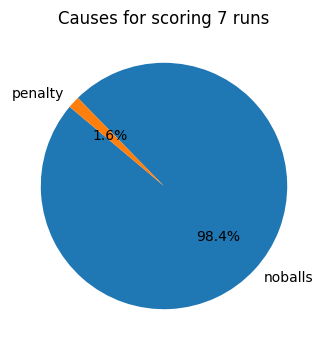

In [62]:
value_counts = df[df['total_run']==7].extra_type.value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Causes for scoring 7 runs')
plt.show()

Looking into scores of 7 and 5 and extra_type

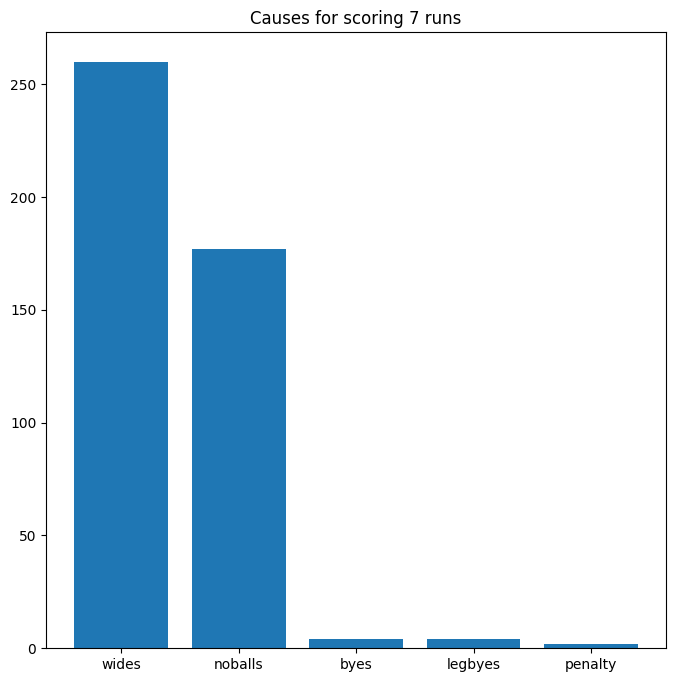

In [81]:
value_counts=df[df['total_run'].isin([7, 5])].extra_type.value_counts()


# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.bar(x=value_counts.index, height=value_counts)
plt.title('Causes for scoring 7 runs')
plt.show()

On plotting, it looks like major causes for 5 seems to be wides and 7 seems to be noball

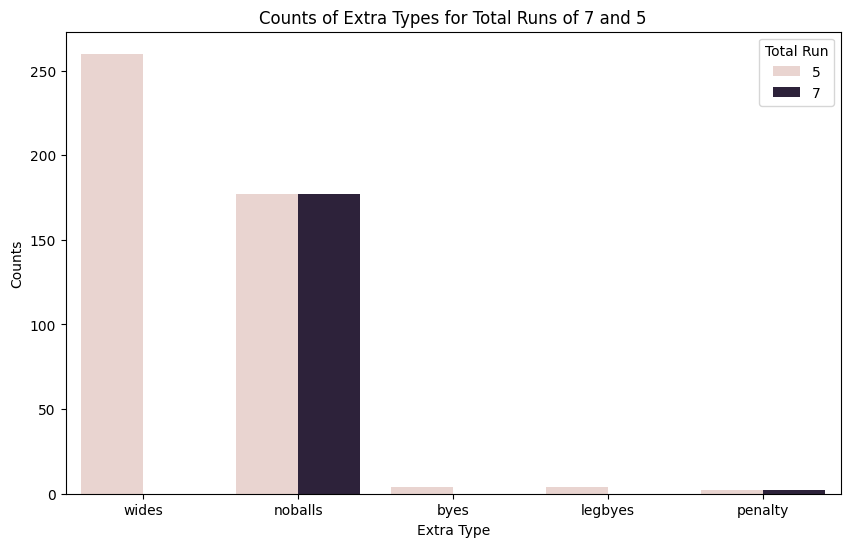

In [83]:

filtered_df = df[df['total_run'].isin([7, 5])]

# Then, get the value counts of 'extra_type' for each 'total_run'
value_counts = filtered_df['extra_type'].value_counts().reset_index()
value_counts.columns = ['extra_type', 'counts']  # Renaming columns for clarity

# Now, merge the counts back to the filtered DataFrame to get 'total_run' for each 'extra_type'
merged_df = pd.merge(filtered_df, value_counts, on='extra_type')

plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='extra_type', y='counts', hue='total_run')
plt.title('Counts of Extra Types for Total Runs of 7 and 5')
plt.xlabel('Extra Type')
plt.ylabel('Counts')
plt.legend(title='Total Run')
plt.show()


Moving on to the next feature kind, there seems to be causes for wicket, plotting the same

In [11]:
df['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [86]:
out=df.kind.value_counts()

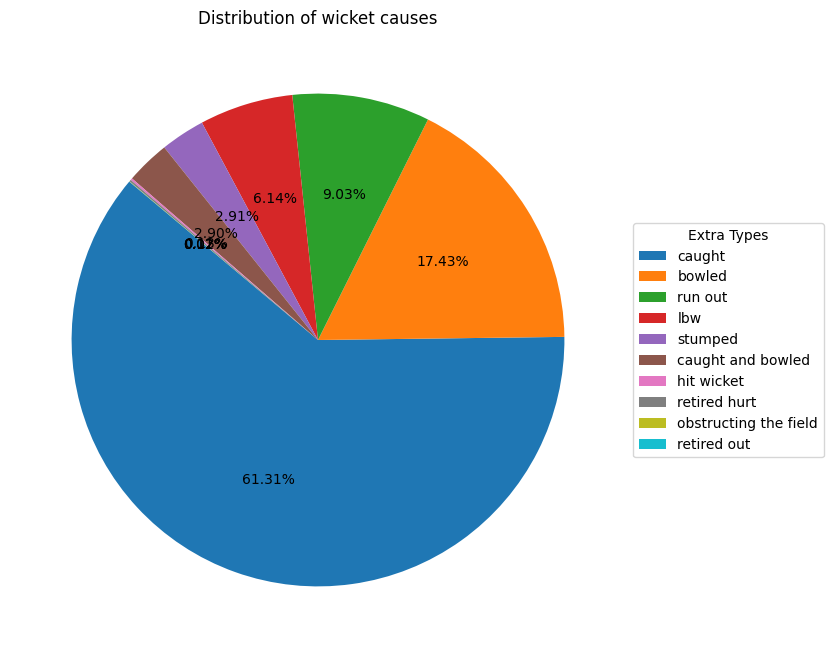

In [98]:
plt.figure(figsize=(8,8))  # Set the figure size
plt.pie(out, autopct='%1.2f%%', startangle=140)
plt.legend(out.index, title="Extra Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of wicket causes')
plt.show()


Lets find out the batsman and non striker who has scored 3 runs majorly.

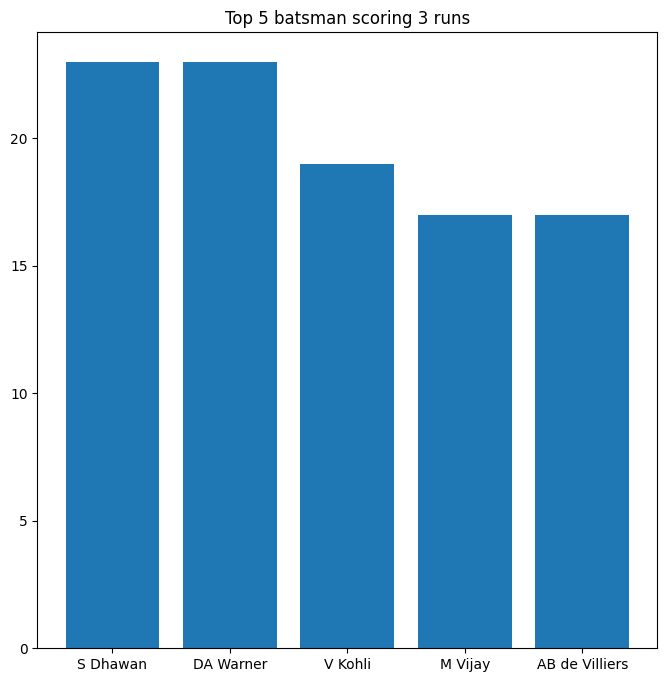

In [124]:
batsman=df[df['batsman_run']==3].batter.value_counts()
plt.figure(figsize=(8, 8))
plt.bar(x=batsman[:5].index, height=batsman[:5])
plt.title('Top 5 batsman scoring 3 runs')
plt.show()

In [120]:
nonstriker=df[df['batsman_run']==3]['non-striker'].value_counts()

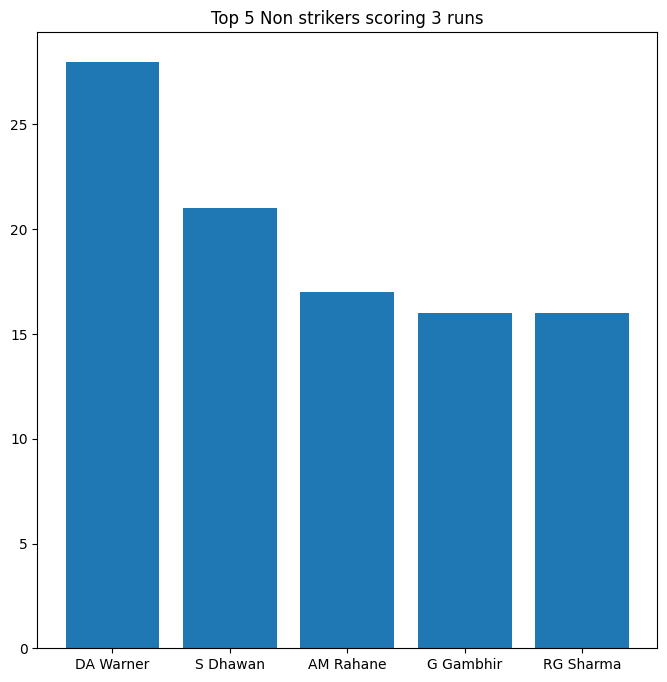

In [125]:
plt.figure(figsize=(8, 8))
plt.bar(x=nonstriker[:5].index, height=nonstriker[:5])
plt.title('Top 5 Non strikers scoring 3 runs')
plt.show()

In [110]:
df[df["batsman_run"]==3].groupby(["total_run","batter","non-striker"]).size()


total_run  batter          non-striker     
3          A Ashish Reddy  DJG Sammy           1
           A Flintoff      ML Hayden           1
           A Nortje        K Rabada            2
           A Symonds       AT Rayudu           1
                           RG Sharma           2
                                              ..
           YS Chahal       PA Patel            1
           Yashpal Singh   BJ Hodge            1
           Yuvraj Singh    DPMD Jayawardene    1
                           RV Uthappa          1
                           V Kohli             1
Length: 570, dtype: int64